### Cumulative Accuracy and Instant Accuracy for FR1

In [5]:
import intervals as invs
from accuracy import graph_cumulative_acc, instant_acc, time_high_acc, graph_instant_acc, graph_avg_corr_rate
from preprocessing import read_excel_by_sheet, calculate_accuracy_by_row, read_csv_clean
import paths

# accuracy.py contains most functions provided related to accuracy analysis
# preprocessing contains functions to read excel and csv files

# Our integrated processed excel file
path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

### FR1 Cumulative Accuracy

In [2]:
ctrl_ending_corr = [] # the list to store the last value of accuracy (overall accuracy) in  control group
cask_ending_corr = [] # the list to store the last value of accuracy (overall accuracy) in experiment group

# Implementation 1
def read_and_record(path:str, sheet:str, ending_corr:list):
    """Read excel file and record ending accuracy

    Args:
        path (str): path of excel files
        sheet (str): sheet name of the excel file
        ending_corr (list): a list that stores the ending accuracy for each session of data (Optional)

    Returns:
        pd:DataFrame: data  preprocessed
    """
    df = read_excel_by_sheet(sheet, path)
    value = df['Percent_Correct'].tail(1).values[0]
    if ending_corr:
        ending_corr.append(value)
    return df

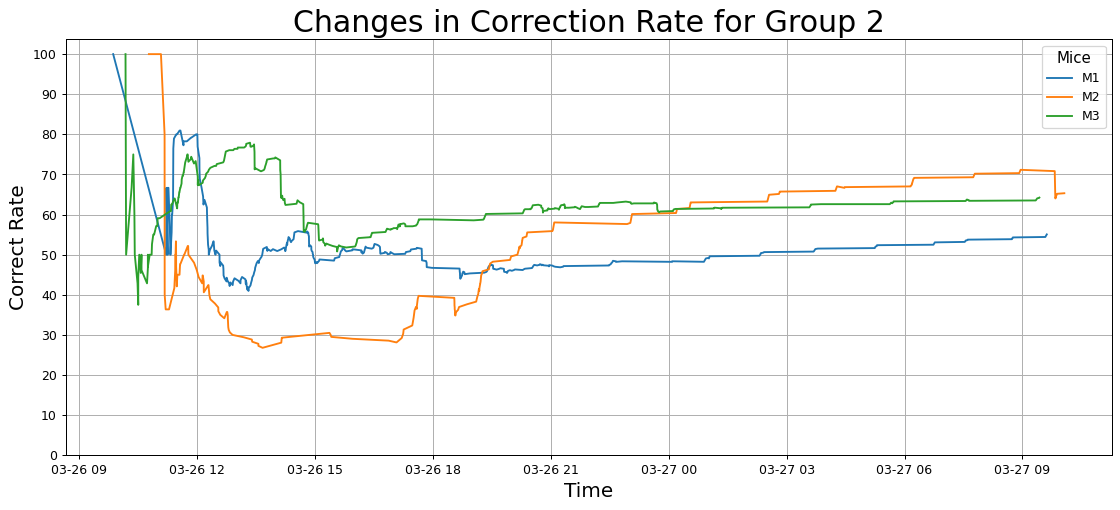

In [3]:
# Usage Example 1
B2M1 = read_and_record(path, 'B2.M2', ctrl_ending_corr)
B2M2 = read_and_record(path, 'B2.M3', ctrl_ending_corr)
B2M3 = read_and_record(path, 'B2.M4', ctrl_ending_corr)

# expect a list of dataframes of a group of mice and a signature for display
graph_cumulative_acc([B2M1, B2M2, B2M3], 2)

In [9]:
# Implementation 2 - handle csv input
def read_and_record(path:str, ending_corr:list):
    df = read_csv_clean(path)
    df = calculate_accuracy_by_row(df)
    value = df['Percent_Correct'].tail(1).values[0]
    ending_corr.append(value)
    return df

In [10]:
# Usage Example 2
ctrl_list = []
# use loop to iterate all files in control group of CD1 IVSA FR1
for path in paths.fr1_ivsa_ctrl:
    ctrl_list.append(read_and_record(path, ctrl_ending_corr))

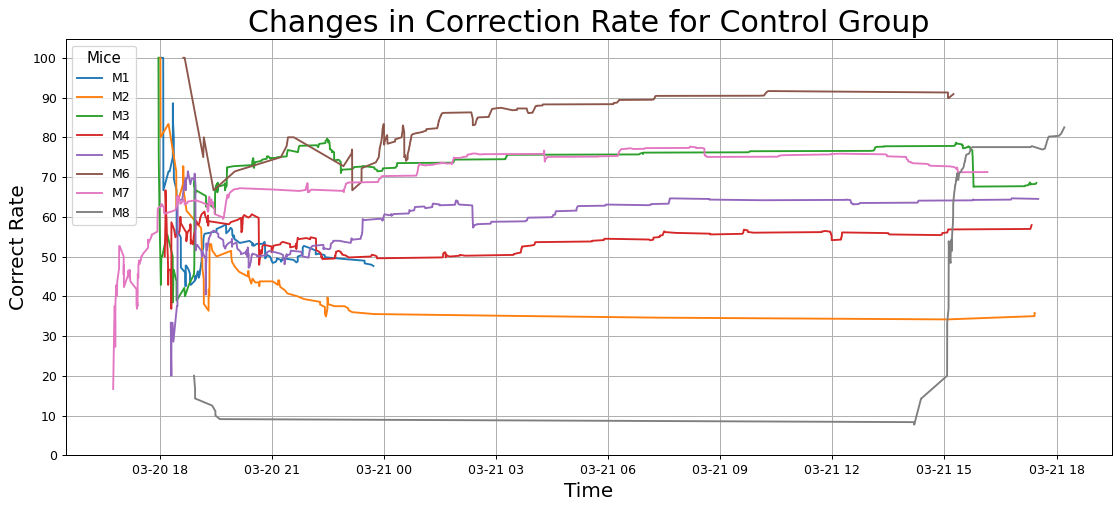

In [11]:
graph_cumulative_acc(ctrl_list, 'Control')

### Accuracy in by hours and 1st learned line
- We may modify the accuracy by each hour to 2hr, 4hr and 10 hr if the duration is too long

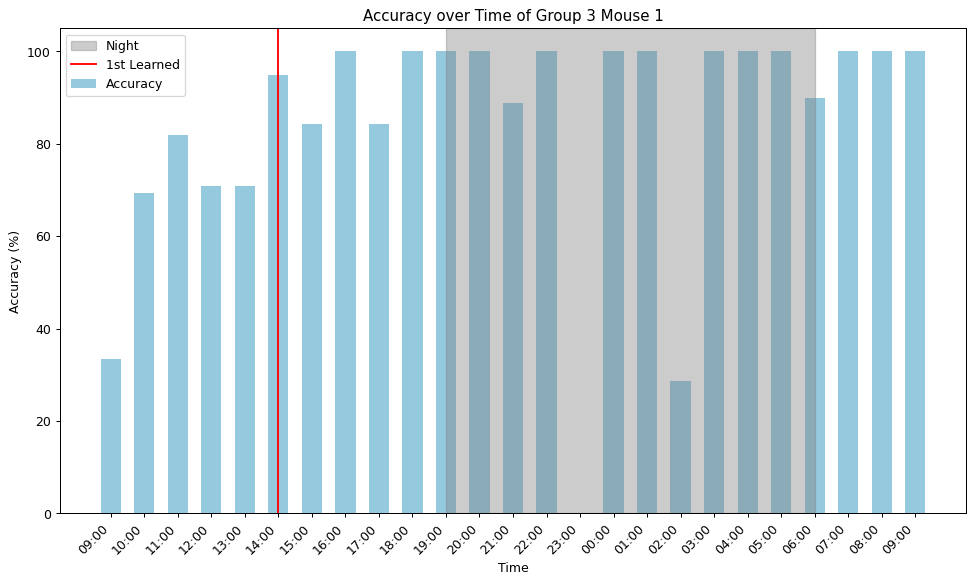

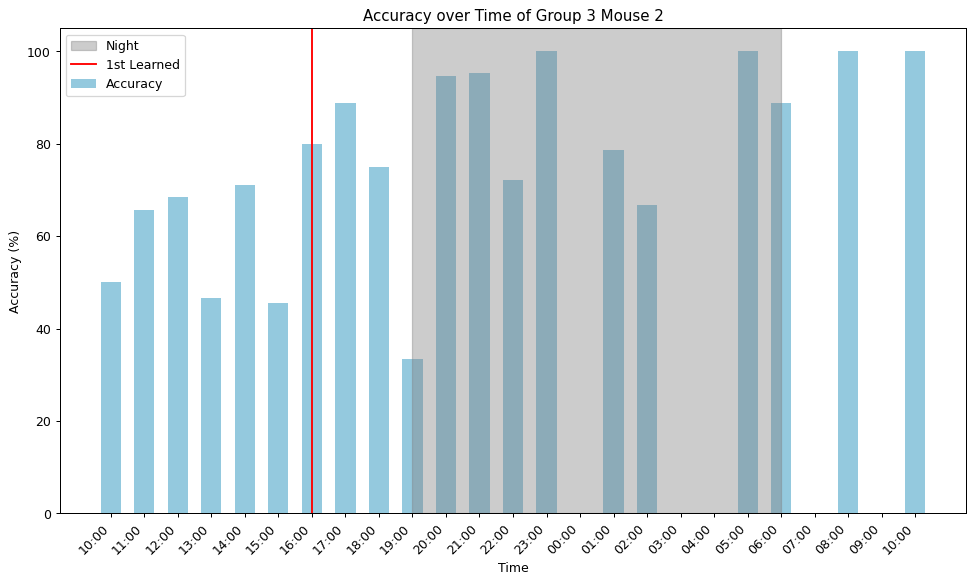

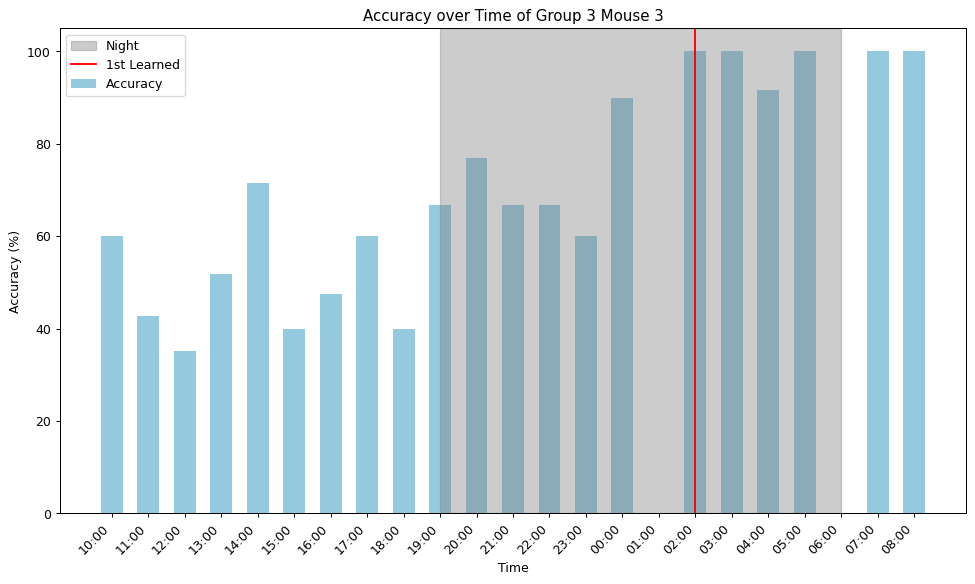

In [13]:
ctrl_times = [] # store the time for each sample needed to reach 2 consecutive hours of 80% accuracy

# We use the first 3 samples as examples
for each in paths.fr1_ctrl_sheet[:3]:
    # skip .DS_Store file or other non-target files
    if each.split('/')[-1].startswith('.'): continue

    # calculate instant accuracy (in groups of 1hr, 2hr, 4hr and 10hr)
    data, info = instant_acc(sheet=each)
    # find the first time of two continuous hours with >80 accuracy
    stamp, hrs = time_high_acc(data)
    # store the hours needed
    ctrl_times.append(hrs)
    # graph the accuracy changes and 1st learned line timestamp with mouse tag (assume it's Group X Mouse Y since we use cask group as examples)
    graph_instant_acc(data, info[0], info[1], stamp)
    # if you not sure the output of info (if may give you a number of group+number), you can use len() function to add condition

### Perform Statistical test
- all statistical tests functions are in intervals.py

In [14]:
# Sample data
ctrl = [2, 3, 4, 5, 3, 4.5, 2.3, 1, 3, 3.5]
exp = [5, 6, 7, 5, 4.5, 6.5, 9, 6, 5.5, 4]

In [15]:
# Perform T Test
print('------Two Side Test---------')
invs.perform_T_test(ctrl, exp) # default is two-sided
print('------One Side Test on exp is greater---------')
invs.perform_T_test(ctrl, exp, test_side='greater')
print('------One Side Test on exp is less---------')
invs.perform_T_test(ctrl, exp, test_side='less')

------Two Side Test---------
P Value is  0.00021793365274150802
There is a significant difference between the two groups.
------One Side Test on exp is greater---------
P Value is  0.00010896682637075401
Experiment group is significantly greater than control group
------One Side Test on exp is less---------
P Value is  0.9998910331736293
There is no significant difference between the two groups.


In [16]:
# Perform Mann-Whitney U rank test
print('------Two Side Test---------')
invs.MannWhitneyUTest(ctrl, exp) # default is two-sided
print('------One Side Test on exp is greater---------')
invs.MannWhitneyUTest(ctrl, exp, test_side='greater')
print('------One Side Test on exp is less---------')
invs.MannWhitneyUTest(ctrl, exp, test_side='less')

------Two Side Test---------
P Value is  0.000730465523826522
There is a significant difference between the two groups.
------One Side Test on exp is greater---------
P Value is  0.000365232761913261
Experiment group is significantly greater than control group
------One Side Test on exp is less---------
P Value is  0.9997236151036267
There is no significant difference between the two groups.
